# Amazon Return Rate Reduction Analysis

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df= pd.read_excel(r"C:\Users\susmi\Downloads\orders_data.xlsx")
df

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,"Mon, 13 Dec, 2021, 11:30 am IST",Shahin,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,"₹1,347.00",₹84.96,Cash On Delivery,Delivered to buyer
167,402-3045457-5360311,"Wed, 1 Dec, 2021, 12:18 pm IST",Sharmistha,"DEHRADUN,",UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹114.46,NaN,Delivered to buyer
168,408-2260162-8323567,"Thu, 9 Dec, 2021, 6:55 pm IST",shashank,"Durg,",CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹105.02,NaN,Delivered to buyer
169,403-5664951-8941100,"Wed, 23 Feb, 2022, 12:43 am IST",Jayeta,"KOLKATA,",WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,"₹1,499.00",₹80.24,Cash On Delivery,Delivered to buyer


# Understanding the data

In [39]:
df.shape

(171, 12)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_no      171 non-null    object
 1   order_date    171 non-null    object
 2   buyer         171 non-null    object
 3   ship_city     171 non-null    object
 4   ship_state    171 non-null    object
 5   sku           171 non-null    object
 6   description   171 non-null    object
 7   quantity      171 non-null    int64 
 8   item_total    153 non-null    object
 9   shipping_fee  145 non-null    object
 10  cod           47 non-null     object
 11  order_status  171 non-null    object
dtypes: int64(1), object(11)
memory usage: 16.2+ KB


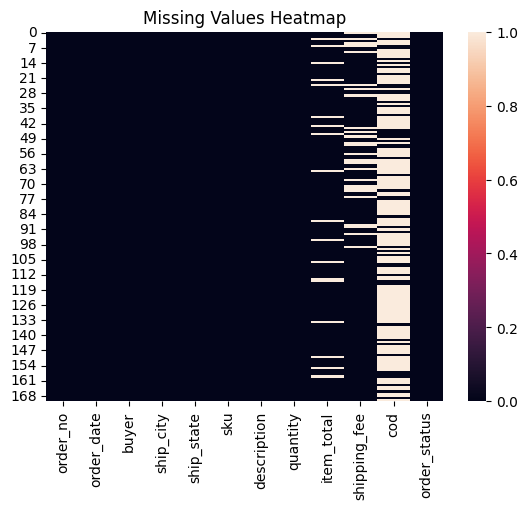

In [43]:
sns.heatmap(df.isnull(), cbar=True)
plt.title("Missing Values Heatmap")
plt.show()

In [45]:
df.isnull().sum()

order_no          0
order_date        0
buyer             0
ship_city         0
ship_state        0
sku               0
description       0
quantity          0
item_total       18
shipping_fee     26
cod             124
order_status      0
dtype: int64

# Data Cleaning

In [48]:
df['item_total'] = pd.to_numeric(df['item_total'].str.replace(',',"").str.extract(r'([\d]+\.[\d]+)')[0])

In [50]:
df['shipping_fee'] = pd.to_numeric(df['shipping_fee'].str.replace(',',"").str.extract(r'([\d]+\.[\d]+)')[0])

In [54]:
# df['order_date'] = pd.to_datetime(
#     df['order_date'].astype(str).str.replace('IST', '').str.strip(),
#     errors='coerce'
# )
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [56]:
df

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,2021-07-18 22:38:00,Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,2021-10-19 18:05:00,Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,NaN,Delivered to buyer
2,171-8103182-4289117,2021-11-28 22:20:00,yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,NaN,Delivered to buyer
3,405-3171677-9557154,2021-07-28 04:06:00,aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,2021-09-28 14:50:00,Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.0,84.96,NaN,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,2021-12-13 11:30:00,Shahin,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,1347.0,84.96,Cash On Delivery,Delivered to buyer
167,402-3045457-5360311,2021-12-01 12:18:00,Sharmistha,"DEHRADUN,",UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,1299.0,114.46,NaN,Delivered to buyer
168,408-2260162-8323567,2021-12-09 18:55:00,shashank,"Durg,",CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,1299.0,105.02,NaN,Delivered to buyer
169,403-5664951-8941100,2022-02-23 00:43:00,Jayeta,"KOLKATA,",WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,1499.0,80.24,Cash On Delivery,Delivered to buyer


In [58]:
df['ship_city'].unique()

array(['CHANDIGARH,', 'PASIGHAT,', 'DEVARAKONDA,', 'MUMBAI,', 'HOWRAH,',
       'ORAI,', 'BAREILLY,', 'BENGALURU,', 'Bhilai,', 'FARIDABAD,',
       'AGARTALA,', 'COONOOR,', 'PUNE,', 'MANTHA,', 'KOLKATA,',
       'MAHALINGPUR,', 'HYDERABAD,', 'MUMBAI 400 026,', 'CUTTACK,',
       'GURUGRAM,', 'JALESWAR,', 'VISAKHAPATNAM,', 'PUNEpune,',
       'NEW DELHI,', 'RAIA,', 'Bhubaneswar,', 'JAGDALPUR,', 'SALEM,',
       'JAMMU,', 'AHMEDABAD,', 'Mumbai,', 'SILCHAR,', 'GUWAHATI,',
       'Ernakulam,', 'KARAIKKUDI,', 'KODAD,', 'BADLAPUR,', 'Surat,',
       'THANE,', 'POLLACHI,', 'Pune,', 'RAIPUR,', 'JALANDHAR,',
       'THISAYANVILAI,', 'BIDHAN NAGAR,', 'New Delhi,', 'Tuticorin,',
       'JAIPUR,', 'CHENNAI,', 'PALAI,', 'KORBA,', 'SAHARANPUR,',
       'THAMARASSERY,', 'GAUTAM BUDDHA NAGAR,', 'KATWA,', 'JODHPUR,',
       'MALDA,', 'NOIDA,', 'CHANDIGARH', 'SECUNDERABAD,', 'Kolkata,',
       'SIWAN,', 'NAVI MUMBAI,', 'Bardez,', 'chennai,', 'Thane District,',
       'INDORE,', 'Visakhapatnam,', 'GHAZIA

In [60]:
df['ship_city'] = df['ship_city'].str.upper().str.replace(',',"")
df['ship_state'] = df['ship_state'].str.upper().str.replace(',',"")

In [62]:
df

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,2021-07-18 22:38:00,Mr.,CHANDIGARH,CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,2021-10-19 18:05:00,Minam,PASIGHAT,ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,NaN,Delivered to buyer
2,171-8103182-4289117,2021-11-28 22:20:00,yatipertin,PASIGHAT,ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,NaN,Delivered to buyer
3,405-3171677-9557154,2021-07-28 04:06:00,aciya,DEVARAKONDA,TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,2021-09-28 14:50:00,Susmita,MUMBAI,MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.0,84.96,NaN,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,2021-12-13 11:30:00,Shahin,MUMBAI,MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,1347.0,84.96,Cash On Delivery,Delivered to buyer
167,402-3045457-5360311,2021-12-01 12:18:00,Sharmistha,DEHRADUN,UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,1299.0,114.46,NaN,Delivered to buyer
168,408-2260162-8323567,2021-12-09 18:55:00,shashank,DURG,CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,1299.0,105.02,NaN,Delivered to buyer
169,403-5664951-8941100,2022-02-23 00:43:00,Jayeta,KOLKATA,WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,1499.0,80.24,Cash On Delivery,Delivered to buyer


In [70]:
df['cod'].unique()

array([0, 1], dtype=int64)

In [76]:
df['cod'] = df['cod'].fillna(0)
df['cod'] = df['cod'].replace('Cash On Delivery', 1)
df['cod']= pd.to_numeric(df['cod'])

In [78]:
df

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,2021-07-18 22:38:00,Mr.,CHANDIGARH,CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,NaN,0,Delivered to buyer
1,404-3964908-7850720,2021-10-19 18:05:00,Minam,PASIGHAT,ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,0,Delivered to buyer
2,171-8103182-4289117,2021-11-28 22:20:00,yatipertin,PASIGHAT,ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,0,Delivered to buyer
3,405-3171677-9557154,2021-07-28 04:06:00,aciya,DEVARAKONDA,TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,1,Delivered to buyer
4,402-8910771-1215552,2021-09-28 14:50:00,Susmita,MUMBAI,MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.0,84.96,0,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,2021-12-13 11:30:00,Shahin,MUMBAI,MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,1347.0,84.96,1,Delivered to buyer
167,402-3045457-5360311,2021-12-01 12:18:00,Sharmistha,DEHRADUN,UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,1299.0,114.46,0,Delivered to buyer
168,408-2260162-8323567,2021-12-09 18:55:00,shashank,DURG,CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,1299.0,105.02,0,Delivered to buyer
169,403-5664951-8941100,2022-02-23 00:43:00,Jayeta,KOLKATA,WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,1499.0,80.24,1,Delivered to buyer


In [80]:
df['order_month'] = pd.to_datetime(df['order_date']).dt.month
df['total_cost'] = df['item_total'] + df['shipping_fee']
df['is_returned'] = df['order_status'].str.contains('Returned', case=False, na=False).astype(int)

In [123]:
df.to_csv(r'C:\Users\susmi\Downloads\Cleaned Dataset.csv', index=False)

In [82]:
df.head(10)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status,order_month,total_cost,is_returned
0,405-9763961-5211537,2021-07-18 22:38:00,Mr.,CHANDIGARH,CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,NaN,0,Delivered to buyer,7,NaN,0
1,404-3964908-7850720,2021-10-19 18:05:00,Minam,PASIGHAT,ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,0,Delivered to buyer,10,509.18,0
2,171-8103182-4289117,2021-11-28 22:20:00,yatipertin,PASIGHAT,ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,0,Delivered to buyer,11,509.18,0
3,405-3171677-9557154,2021-07-28 04:06:00,aciya,DEVARAKONDA,TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,1,Delivered to buyer,7,NaN,0
4,402-8910771-1215552,2021-09-28 14:50:00,Susmita,MUMBAI,MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.0,84.96,0,Delivered to buyer,9,1183.96,0
5,406-9292208-6725123,2021-06-17 21:12:00,Subinita,HOWRAH,WEST BENGAL,SKU: HH-FOWV-5YWO,Women's Trendy Pure Leather Clutch Purse | Lea...,1,200.0,NaN,0,Delivered to buyer,6,NaN,0
6,404-5794317-7737924,2021-08-12 20:03:00,shailendra,ORAI,UTTAR PRADESH,SKU: TQ-OE6K-9DIK,Ultra Slim 100% Pure Leather Men's Wallet with...,1,NaN,NaN,1,Returned to seller,8,NaN,1
7,405-8702211-4054722,2021-09-29 14:55:00,Pratima,BAREILLY,UTTAR PRADESH,SKU: S1-A92Q-JU3X,100% Pure Leather Shantiniketan Clutch Purse: ...,1,399.0,84.96,1,Delivered to buyer,9,483.96,0
8,171-1434812-8061163,2021-11-13 19:37:00,Ipshita,BENGALURU,KARNATAKA,SKU: 3F-4R9N-Z8NJ,Set of 2 Pure Leather Block Print Round Jewelr...,1,399.0,84.96,0,Delivered to buyer,11,483.96,0
9,171-7954707-4463549,2021-08-09 16:47:00,A.Jayaprada,BHILAI,CHHATTISGARH,SKU: NU-CKZ5-4O49,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.0,NaN,0,Delivered to buyer,8,NaN,0


# EDA

In [80]:
df.describe()

,order_date,quantity,item_total,shipping_fee,cod,order_month,total_cost,is_returned
count,171,171.000000,153.000000,145.000000,171.000000,171.000000,130.000000,171.000000
mean,2021-11-05 22:29:20.350877184,1.087719,582.856209,84.748414,0.274854,8.426901,687.843538,0.064327
min,2021-06-13 19:08:00,1.000000,175.000000,47.200000,0.000000,1.000000,297.200000,0.000000
25%,2021-09-22 05:00:00,1.000000,399.000000,84.960000,0.000000,7.000000,483.960000,0.000000
50%,2021-11-13 19:37:00,1.000000,449.000000,84.960000,0.000000,10.000000,533.960000,0.000000
75%,2021-12-18 11:49:00,1.000000,549.000000,84.960000,1.000000,11.000000,605.830000,0.000000
max,2022-02-25 20:44:00,4.000000,3897.000000,241.900000,1.000000,12.000000,4138.900000,1.000000
std,NaN,0.445132,488.100122,26.562623,0.447752,3.746242,527.167787,0.246056


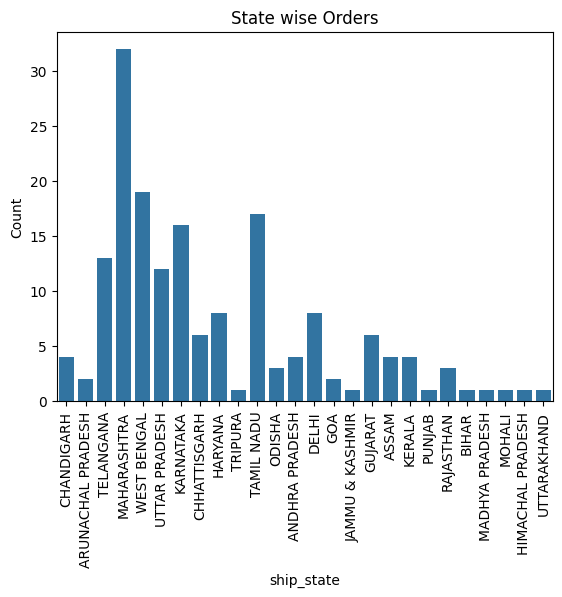

In [94]:
sns.countplot(x='ship_state', data=df)
plt.title('State wise Orders')
plt.xlabel('ship_state')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

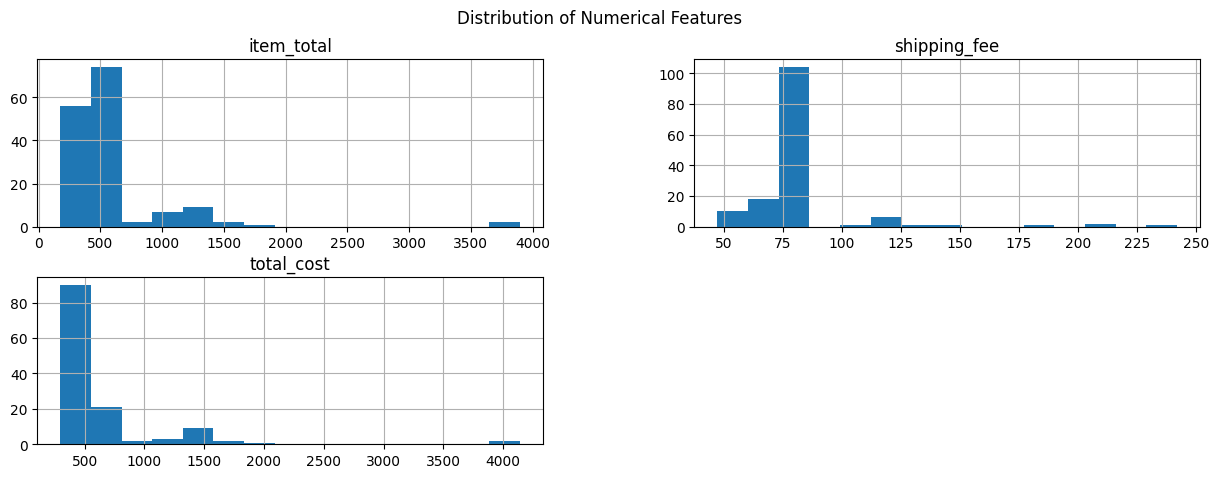

In [84]:
# Histograms for numerical features
numerical_features = ['item_total', 'shipping_fee', 'total_cost']
df[numerical_features].hist(bins=15, figsize=(15, 5))
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [86]:
# 1. Overall Return Rate
overall_return_rate = df['is_returned'].value_counts(normalize=True) * 100
print("Overall Return Rate (%):")
print(overall_return_rate)

Overall Return Rate (%):
is_returned
0    93.567251
1     6.432749
Name: proportion, dtype: float64


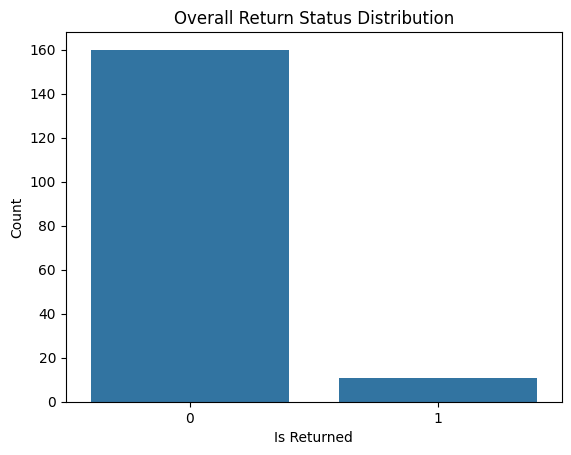

In [94]:
# Distribution of the target variable
sns.countplot(x='is_returned', data=df)
plt.title('Overall Return Status Distribution')
plt.xlabel('Is Returned')
plt.ylabel('Count')
plt.show()

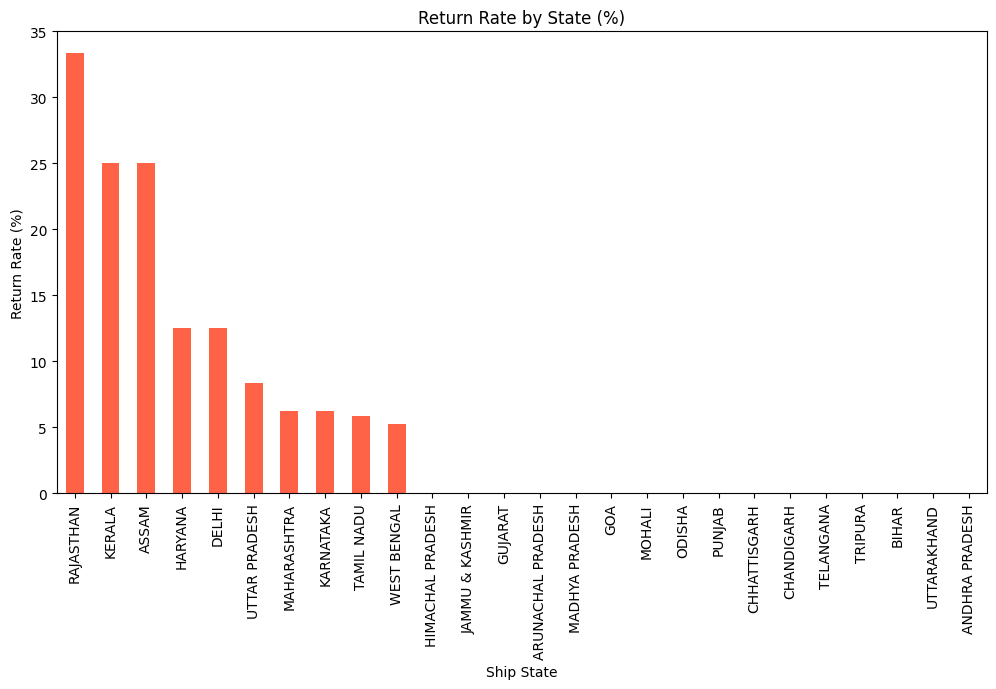

In [101]:
# 2. Return Rate by State
state_return_rate = df.groupby('ship_state')['is_returned'].value_counts(normalize=True).unstack().fillna(0) * 100

plt.figure(figsize=(12,6))
state_return_rate[1].sort_values(ascending=False).plot(kind='bar', color='tomato')
plt.title('Return Rate by State (%)')
plt.xlabel('Ship State')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=90)
plt.show()

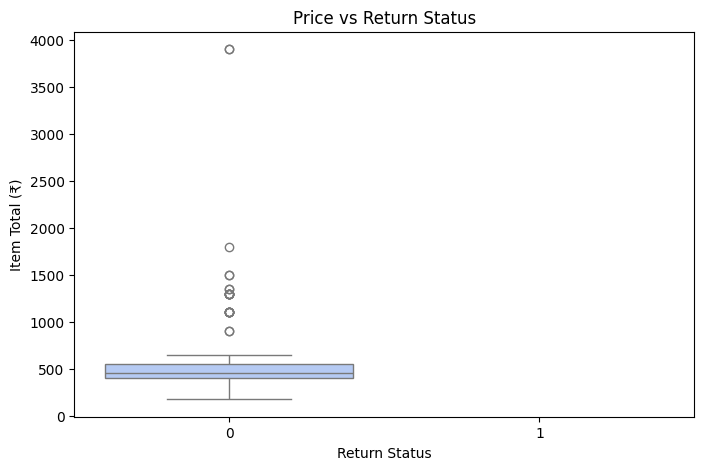

In [111]:
# 3. Price vs Return
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='is_returned', y='item_total',hue='is_returned', palette='coolwarm', legend=False)
plt.title('Price vs Return Status')
plt.ylabel('Item Total (₹)')
plt.xlabel('Return Status')
plt.show()

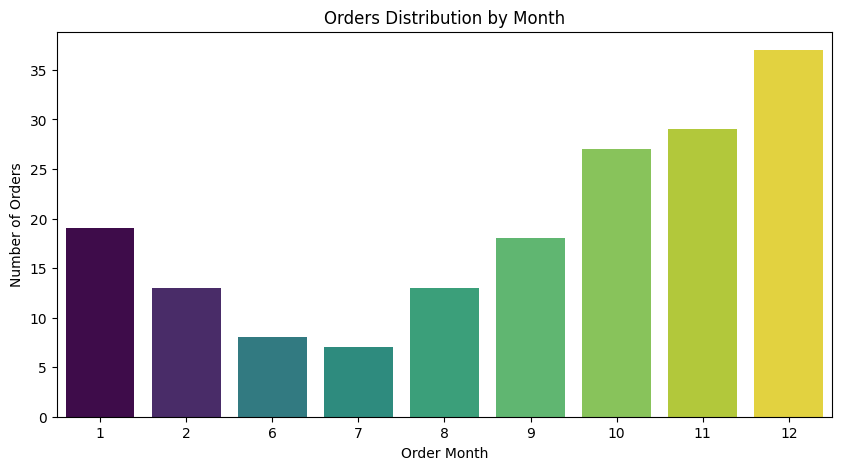

In [115]:
# 4. Orders by Month
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='order_month', hue='order_month', palette='viridis', legend=False)
plt.title('Orders Distribution by Month')
plt.xlabel('Order Month')
plt.ylabel('Number of Orders')
plt.show()

# Logistic Regression Modal

In [112]:
conda install scikit-learn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [145]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [153]:
features = ['item_total', 'shipping_fee', 'quantity', 'order_month', 'cod', 'ship_state']
target = 'is_returned'

In [155]:
model_data = df[features + [target]].copy()

In [157]:
model_data = model_data.fillna(0)

In [159]:
le_cod = LabelEncoder()
model_data['cod'] = le_cod.fit_transform(model_data['cod'].astype(str))

le_state = LabelEncoder()
model_data['ship_state'] = le_state.fit_transform(model_data['ship_state'].astype(str))

In [161]:
X = model_data[features]
y = model_data[target]

In [189]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [171]:
y_pred = model.predict(X_test)

In [173]:
# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.50      0.67         4

    accuracy                           0.96        52
   macro avg       0.98      0.75      0.82        52
weighted avg       0.96      0.96      0.96        52



In [175]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[48  0]
 [ 2  2]]


In [177]:
# Predict probabilities (for entire dataset)
df['return_probability'] = model.predict_proba(X)[:, 1]  # Probability of being Returned

In [179]:
# View sample
df[['order_no', 'return_probability']].head()

,order_no,return_probability
0,405-9763961-5211537,5.554628e-11
1,404-3964908-7850720,2.323494e-11
2,171-8103182-4289117,2.229554e-11
3,405-3171677-9557154,6.915884e-01
4,402-8910771-1215552,1.704342e-27


# High-Risk products

In [181]:
# Filter high risk products (more than 50% chance of being returned)
high_risk_products = df[df['return_probability'] > 0.5]

In [187]:
# Save to CSV
high_risk_products[['order_no', 'sku', 'description', 'item_total', 'ship_state', 'return_probability']].to_csv(r'C:\Users\susmi\Downloads\High risk Products.csv', index=False)